# Dataset Introduction
In this project we are defining the "best" neighborhood in Pittsburgh as the one which is gives the most opportunity for its members to be healthy. For this dataset, we are analyzing the number of public parks in each neighborhood, with the assumption that having more parks in a neighborhood has a positive impact on the health of the residents. This is because having an open park would encourage more residents to go outside and exercise.  

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

parks = pd.read_csv("parks.csv")
parks.head()

,_id,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,2,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,3,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,4,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,5,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


In [4]:
counter = dict()
for row in parks["neighborhood"]:
    
    if row not in counter:
        counter[row] = 1
    else:
        counter[row] = counter[row] + 1

print(counter)
len(counter)

{'Beechview': 8, 'Crawford-Roberts': 3, 'North Shore': 3, 'Allegheny Center': 2, 'Central Business District': 10, 'Central Northside': 3, 'East Liberty': 12, 'Bedford Dwellings': 1, 'South Side Slopes': 7, 'South Side Flats': 6, 'Lower Lawrenceville': 3, 'Banksville': 2, 'South Oakland': 5, 'Homewood North': 2, 'Hazelwood': 6, 'Bon Air': 1, 'Central Oakland': 4, 'Brighton Heights': 4, 'Brookline': 3, 'Spring Garden': 2, 'Lincoln-Lemington-Belmar': 3, 'Windgap': 1, 'Troy Hill': 5, 'Westwood': 3, 'Perry South': 2, 'Homewood West': 1, 'Squirrel Hill South': 6, 'Strip District': 2, 'Arlington': 1, 'Stanton Heights': 1, 'Crafton Heights': 2, 'Upper Lawrenceville': 3, 'East Carnegie': 1, 'East Hills': 1, 'Point Breeze': 7, 'Allentown': 2, 'Duquesne Heights': 2, 'Mount Washington': 6, 'Esplen': 1, 'Fairywood': 1, 'Fineview': 2, 'Garfield': 3, 'Greenfield': 3, 'Larimer': 3, 'Bloomfield': 3, 'Perry North': 2, 'North Oakland': 1, 'Hays': 1, 'Elliott': 4, 'Highland Park': 2, 'Homewood South': 1, 

73

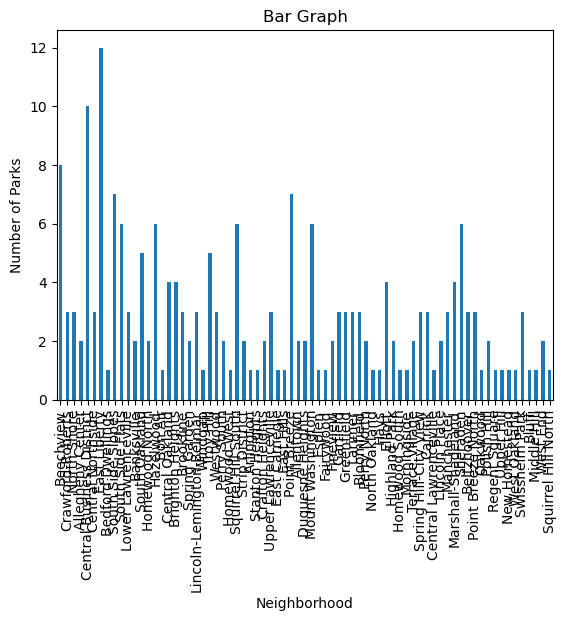

In [5]:
df = pd.DataFrame(list(counter.items()), columns=['Neighborhood', 'Number of Parks'])

df.plot(kind='bar', x='Neighborhood', y='Number of Parks', legend=False)
plt.xlabel('Neighborhood')
plt.ylabel('Number of Parks')
plt.title('Bar Graph')
plt.show()

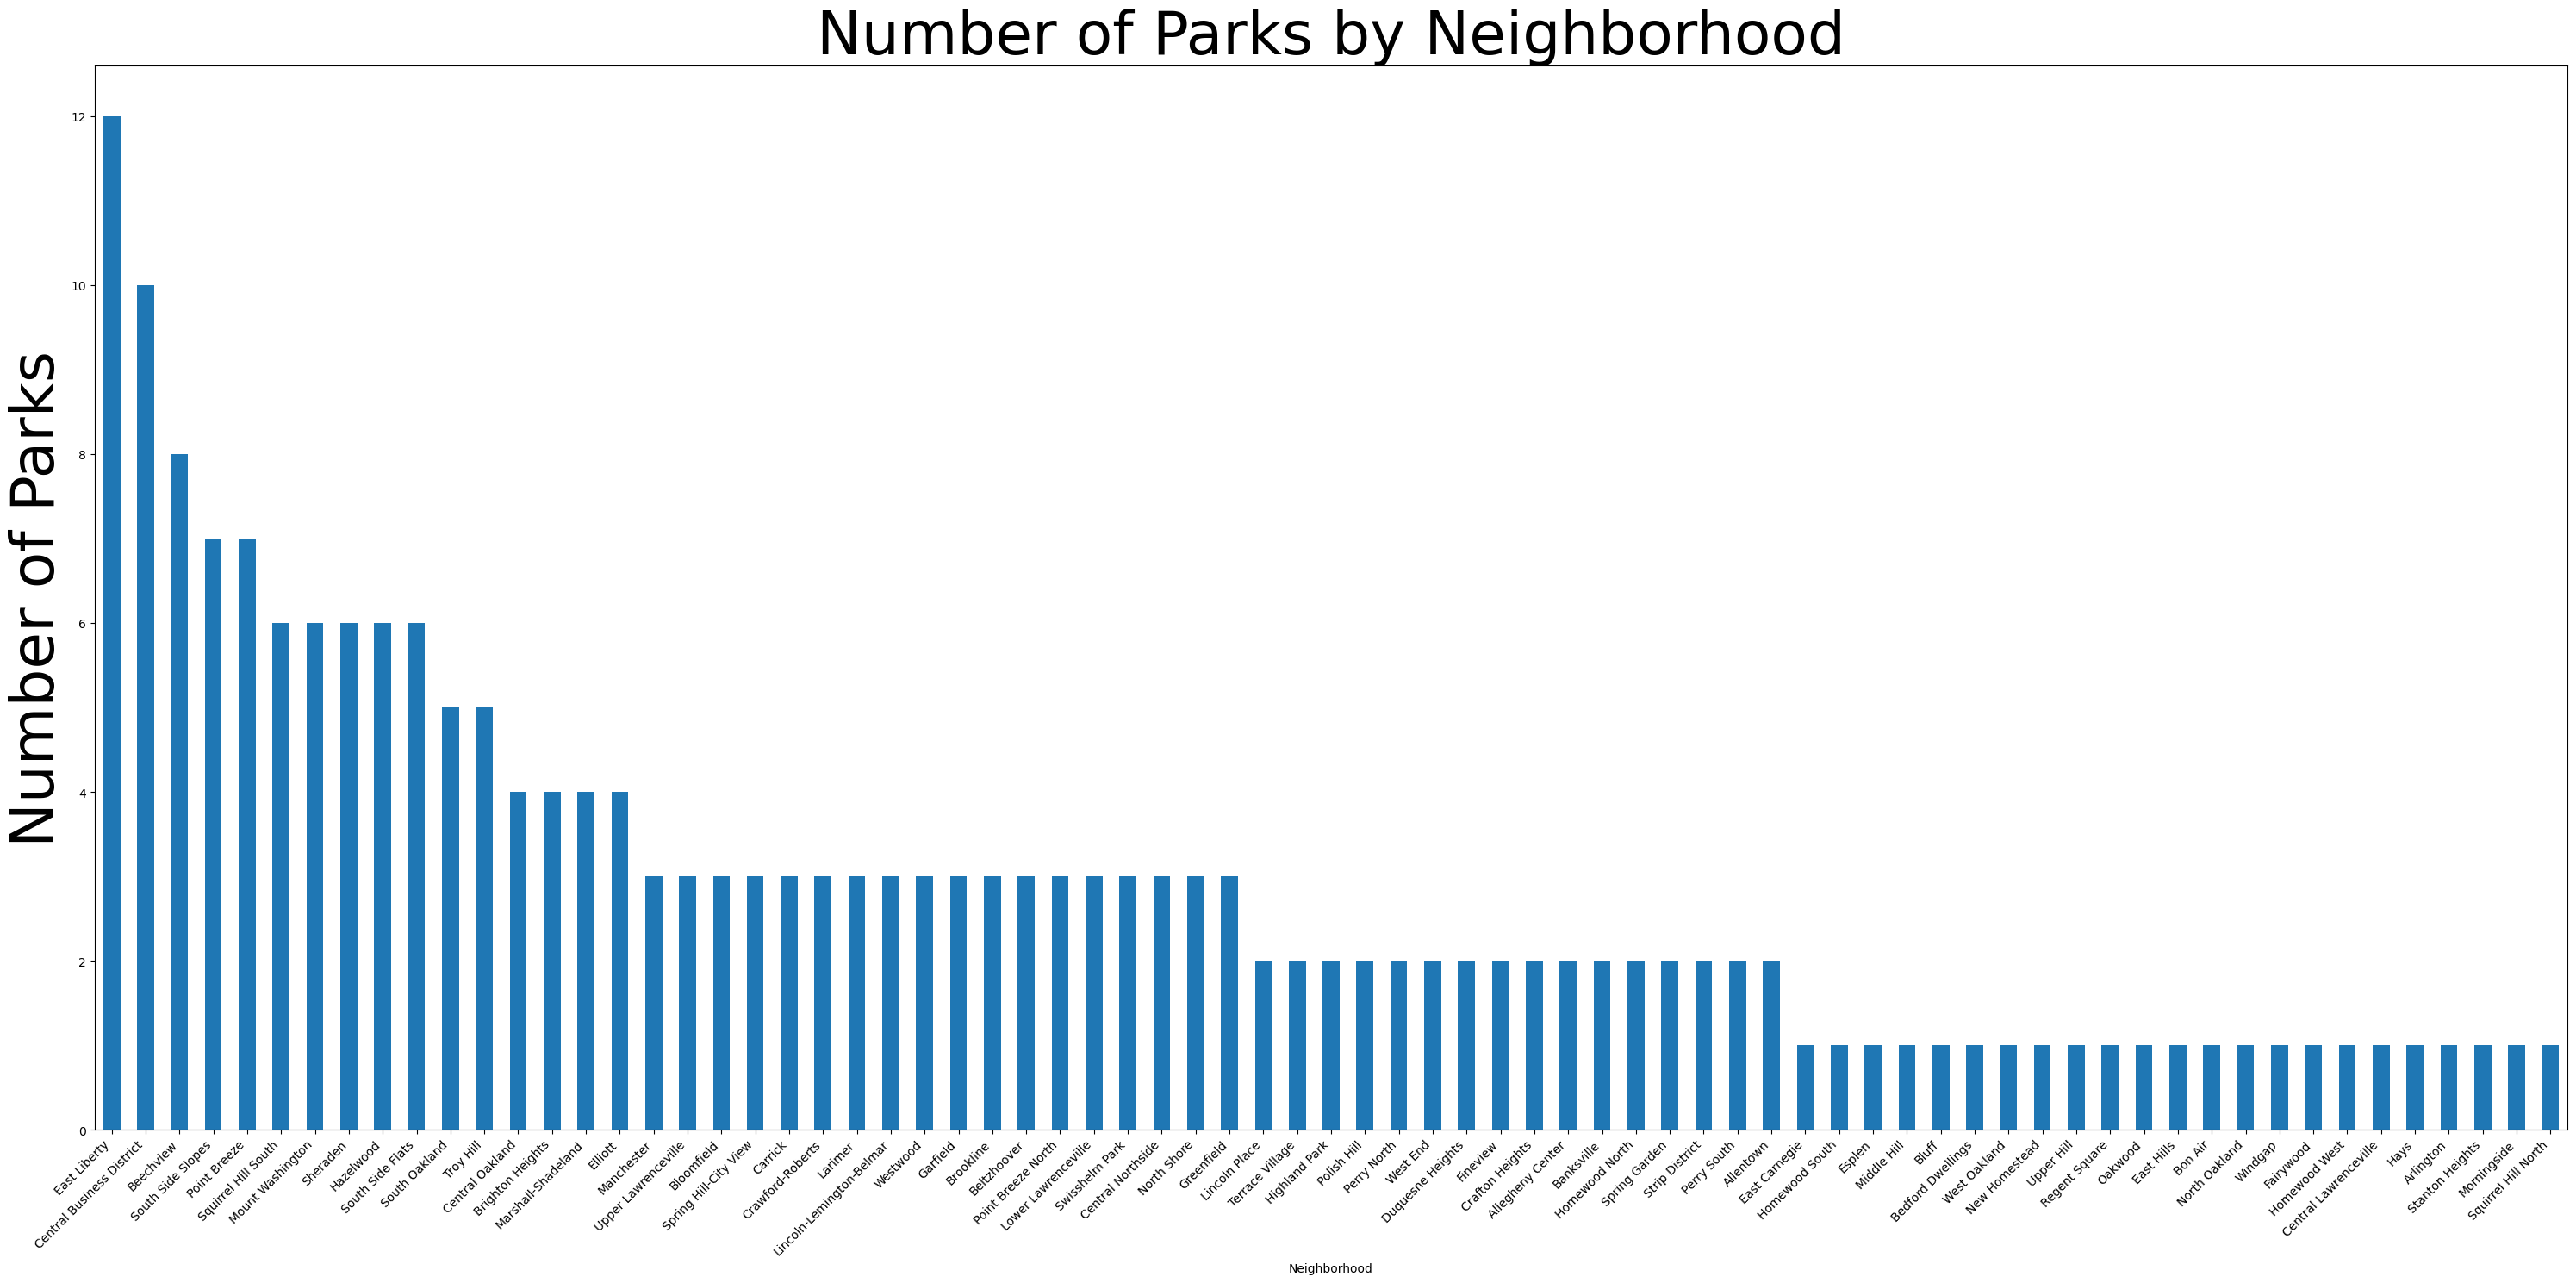

In [6]:
df = pd.DataFrame(list(counter.items()), columns=['Neighborhood', 'Number of Parks']).sort_values(by='Number of Parks', ascending=False)
plt.figure(figsize=(30, 15)) 
ax = df.plot(kind='bar', x='Neighborhood', y='Number of Parks', legend=False, ax=plt.gca()) 

plt.xlabel('Neighborhood')
plt.ylabel('Number of Parks', fontsize = 50)
plt.title('Number of Parks by Neighborhood', fontsize = 50)
plt.xticks(rotation=45, ha="right")
plt.gca().margins(x=0.02)
plt.tight_layout()

plt.show()

In [7]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

parks = pd.read_csv("parks.csv")
num_parks = parks.groupby("neighborhood")['_id'].count()
num_parks.sort_values(ascending=False)
print(num_parks)

neighborhood
Allegheny Center       2
Allentown              2
Arlington              1
Banksville             2
Bedford Dwellings      1
                      ..
Upper Lawrenceville    3
West End               2
West Oakland           1
Westwood               3
Windgap                1
Name: _id, Length: 73, dtype: int64


<Axes: >

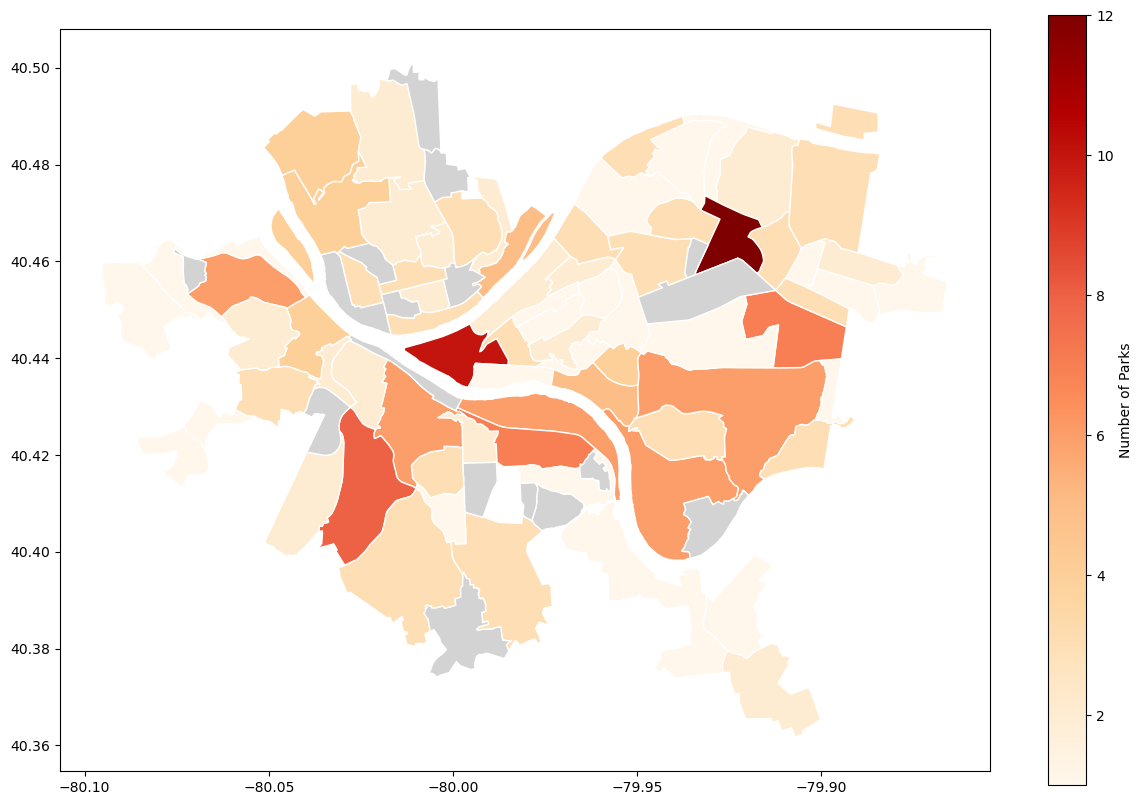

In [8]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
parks_map = neighborhoods.merge(num_parks, how='left', left_on='hood', right_on='neighborhood')
parks_map[['hood','_id','geometry']].head()
parks_map.plot(column='_id', 
               cmap='OrRd',  
               edgecolor="white",   
               legend=True, 
               legend_kwds={'label': "Number of Parks"}, 
               figsize=(15, 10),   
               missing_kwds={"color": "lightgrey"}
               )

# Conclusion

The top 5 most healthiest neighborhoods in Pittsburgh, by the number of parks they have, are: 
1) East Liberty (12)
2) Central Business District (10)
3) Beechview (8)
4) Point Breeze (7)
4) South Side Slopes (7)